# AI Lab Assignment: Regression Models

Objective: You will apply regression techniques to predict a target variable using various classical AI models. The dataset remains the same (Top 1000 IMDb Movies),
but now your task is to train models to predict a selected column based on relevant features.

## Scenario

You are a data scientist at DaciaVision Analytics. After completing the initial data preprocessing and feature engineering phase, your team is now tasked with building
predictive models to forecast a key numerical variable of interest. Your goal is to analyze different regression models and compare their performance.

## Part 1: Selecting the Target Variable or Dependent variable (1 point)

Choose a numerical column from the dataset that you believe is the best to predict based on available features.

- Justify your selection using data analysis and visualization;
- Show correlations between this target variable and other potential features.

Let us import some necessary libraries first

In [1]:
import numpy as np  # Numerical computing
import pandas as pd  # Data manipulation
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns  # Advanced data visualization
from sklearn.model_selection import train_test_split  # Splitting dataset
from sklearn.preprocessing import StandardScaler  # Data scaling
from sklearn.linear_model import LinearRegression  # Linear Regression model
from sklearn.metrics import mean_squared_error, r2_score  # Evaluation metrics

**Correlation** analysis is a statistical method used to measure the strength and direction of the relationship between 2 numerical variables. It helps determine how **changes** in one variable are associated with **changes** in another.

Let us load our "imdb_top_1000_processed.csv" file in a dataset and see the first 10 rows of our dataset.

In [2]:
df = pd.read_csv("imdb_top_1000_processed.csv")

In [3]:
df.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC22,PC23,PC24,Series_Title,Overview,Director,Star1,Star2,Star3,Star4
0,-0.770670,-0.772740,-2.034184,2.624444,0.564704,1.681482,2.169178,-2.589747,-1.969936,-0.819379,...,-0.593276,-0.965152,-0.497730,12 Angry Men,A jury holdout attempts to prevent a miscarria...,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler
1,2.018268,0.450113,-1.232824,5.670180,2.470298,-0.268356,-1.307863,-2.527081,-1.918646,-0.133358,...,-0.137961,-0.130458,0.593395,"Il buono, il brutto, il cattivo",A bounty hunting scam joins two men in an unea...,Sergio Leone,Clint Eastwood,Eli Wallach,Lee Van Cleef,Aldo Giuffr
2,1.680726,1.226071,-1.329524,1.501444,1.823010,0.604166,2.265303,-0.668714,-0.054109,0.302375,...,-0.819232,1.223181,-0.690074,Gisaengchung,Greed and class discrimination threaten the ne...,Bong Joon Ho,Kang-ho Song,Lee Sun-kyun,Cho Yeo-jeong,Choi Woo-sik
3,2.076977,0.837304,-1.712732,1.060544,1.393556,-0.012802,1.562090,-2.188812,-0.685900,-0.524516,...,-0.760079,-0.848909,0.473969,Cidade de Deus,"In the slums of Rio, two kids' paths diverge a...",Fernando Meirelles,Ktia Lund,Alexandre Rodrigues,Leandro Firmino,Matheus Nachtergaele
4,-0.739192,1.702141,3.926397,3.707165,-0.164482,0.409335,1.996690,-2.950445,1.322394,-0.581202,...,-1.038754,-0.239757,0.217043,Sen to Chihiro no kamikakushi,"During her family's move to the suburbs, a sul...",Hayao Miyazaki,Daveigh Chase,Suzanne Pleshette,Miyu Irino,Rumi Hiiragi
5,-0.851332,-0.334221,-0.271851,0.149363,2.643378,0.661777,2.452308,0.884925,-0.593105,-0.075522,...,-0.735374,-0.726134,0.537590,La vita  bella,When an open-minded Jewish librarian and his s...,Roberto Benigni,Roberto Benigni,Nicoletta Braschi,Giorgio Cantarini,Giustino Durano
6,2.277910,0.404423,1.278429,4.047873,-0.875833,-0.862634,0.670581,-0.243209,-1.359307,-1.583193,...,-1.505598,0.418280,-0.037303,Shichinin no samurai,A poor village under attack by bandits recruit...,Akira Kurosawa,Toshir Mifune,Takashi Shimura,Keiko Tsushima,Yukiko Shimazaki
7,-0.228775,-0.156982,-1.480452,0.447966,2.400546,1.748298,1.540880,-0.502674,-0.519862,-2.412228,...,-1.666574,-0.201124,0.414397,Whiplash,A promising young drummer enrolls at a cut-thr...,Damien Chazelle,Miles Teller,J.K. Simmons,Melissa Benoist,Paul Reiser
8,-0.137779,0.750982,-0.110843,-0.922548,1.892968,2.178773,1.496256,-0.491997,-1.353034,-0.600786,...,-0.028524,1.004541,1.937332,The Intouchables,After he becomes a quadriplegic from a paragli...,Olivier Nakache,ric Toledano,Franois Cluzet,Omar Sy,Anne Le Ny
9,2.724340,-0.198632,0.720657,0.474105,0.921752,2.334818,2.043835,0.156661,-0.333187,-3.121745,...,0.466629,0.519331,-0.035101,The Pianist,A Polish Jewish musician struggles to survive ...,Roman Polanski,Adrien Brody,Thomas Kretschmann,Frank Finlay,Emilia Fox


We have 31 columns, from which 24 are numerical and 7 are strings features.

So let us see in a heatmap how our numerical fetaures depend on eachoder.

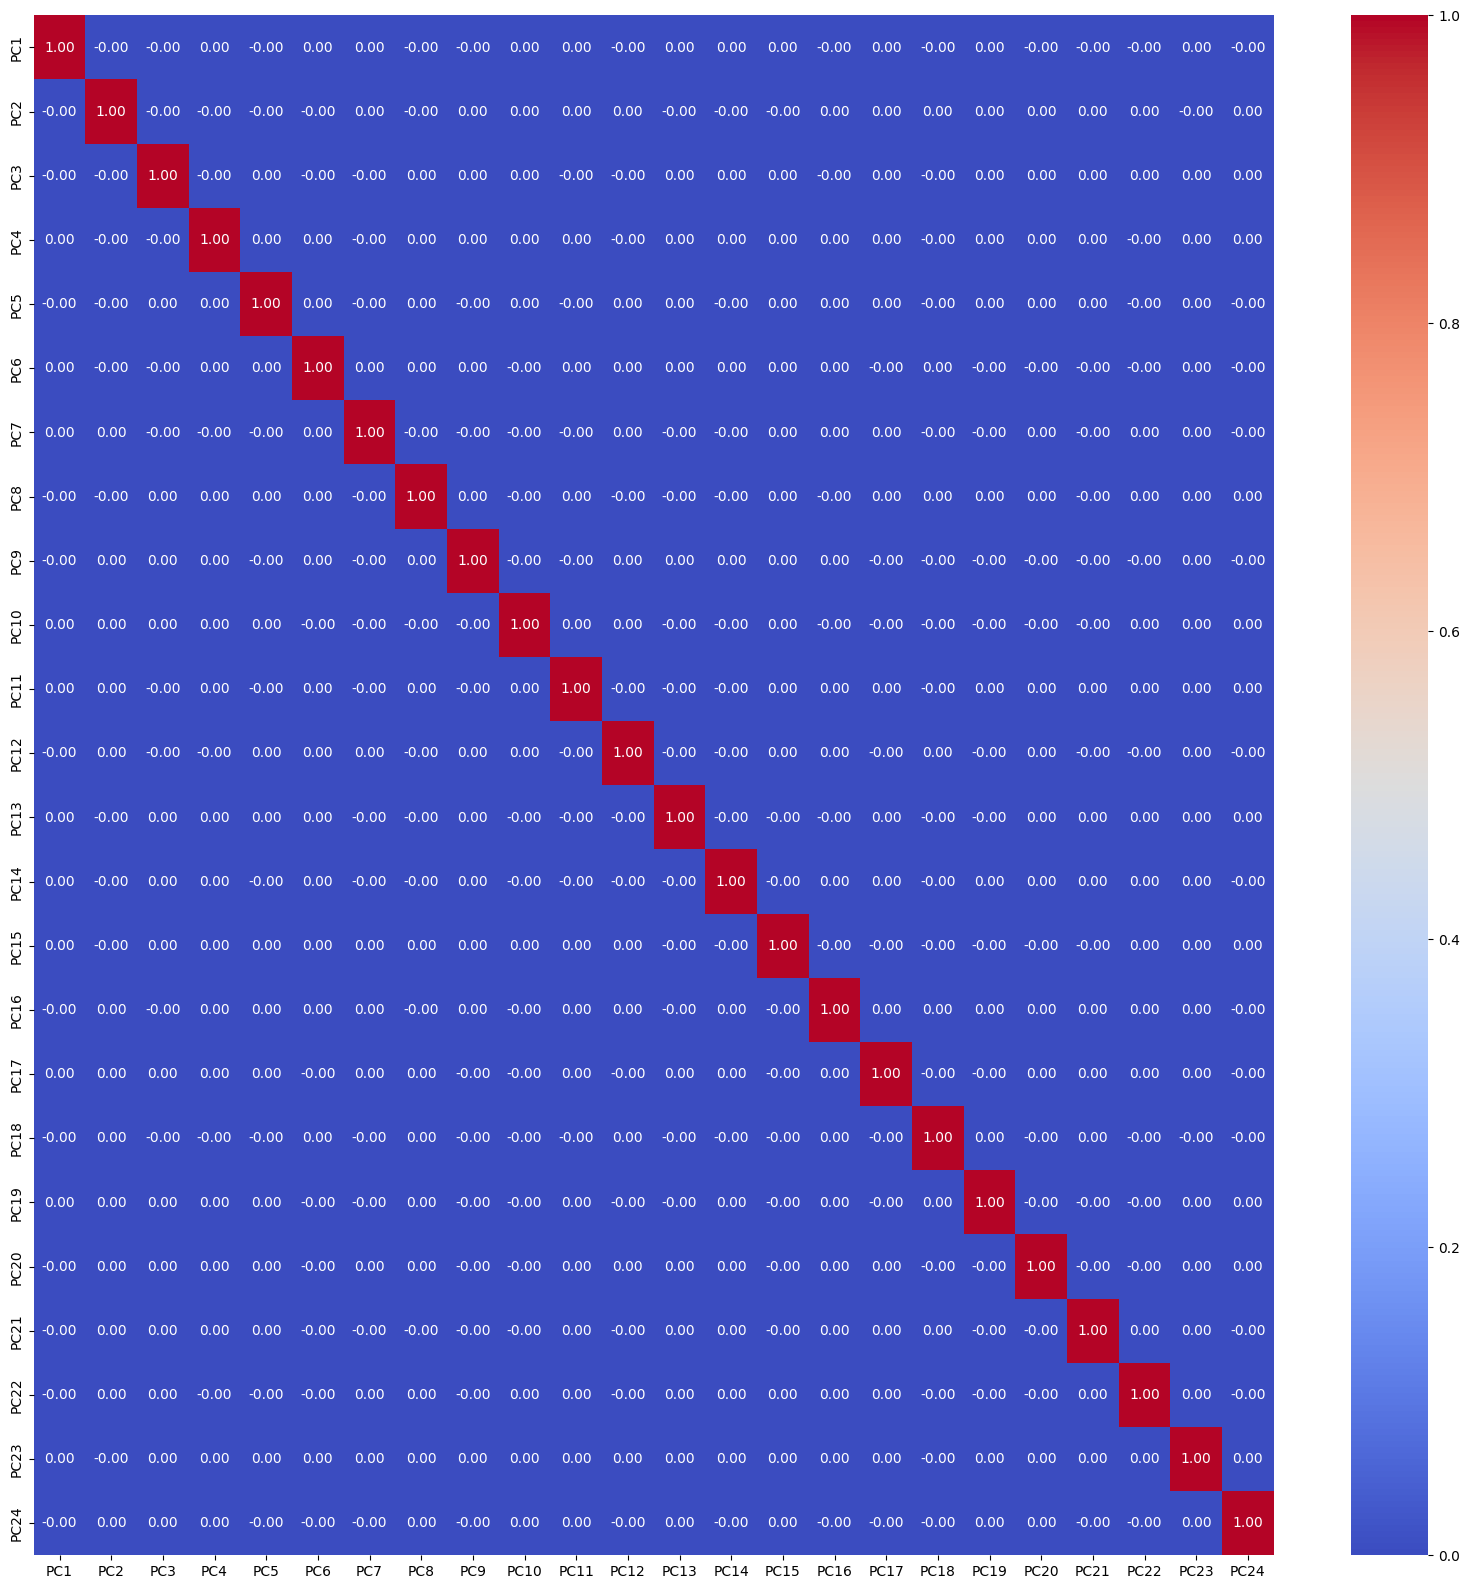

In [6]:
df_copy = df.copy()

df_copy.drop(columns=["Series_Title","Overview","Director","Star1","Star2","Star3","Star4"], inplace=True)
corr_matrix = df_copy.corr()

plt.figure(figsize=(20,20))

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")

plt.show()